In [2]:
%pip install pandas numpy seaborn matplotlib scikit-learn sentence-transformers

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries ###

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sentence_transformers import SentenceTransformer
from preprocessing import clean_data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

### Loading & Inspecting Data ###


In [4]:
# Loading Data
delta_df = pd.read_csv("datasets/Delta_Airline_Review_Dataset-Asof02172023.csv")


# Inspecting Data
print("----Data Info----\n")
print(delta_df.info())

print("\n----Data Shape----\n")
print(f'delta_df.shape: {delta_df.shape}')

print("\n----Data Stats----\n")
print(delta_df.describe())

print("\n----Data Null----\n")
print(delta_df.isnull().sum())


----Data Info----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     2689 non-null   int64 
 1   star rating     2689 non-null   int64 
 2   date            2689 non-null   object
 3    Seat Type      2689 non-null   object
 4   routes          2263 non-null   object
 5   traveler_types  2282 non-null   object
 6   country         2689 non-null   object
 7   reviews         2689 non-null   object
dtypes: int64(2), object(6)
memory usage: 168.2+ KB
None

----Data Shape----

delta_df.shape: (2689, 8)

----Data Stats----

       Customer_ID  star rating
count  2689.000000  2689.000000
mean   1345.000000     3.860915
std     776.391761     3.462060
min       1.000000     0.000000
25%     673.000000     1.000000
50%    1345.000000     2.000000
75%    2017.000000     8.000000
max    2689.000000    10.000000

----Data Null----

Cu

### Cleaning Data ###

In [5]:
cleaned_delta_df = clean_data(delta_df)
print(f'cleaned_delta_df.shape: {cleaned_delta_df.shape}')

----Data Cleaned----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer_ID     2689 non-null   int64         
 1   star rating     2689 non-null   int64         
 2   date            2689 non-null   datetime64[ns]
 3    Seat Type      2689 non-null   object        
 4   routes          2689 non-null   object        
 5   traveler_types  2689 non-null   object        
 6   country         2689 non-null   object        
 7   reviews         2689 non-null   object        
 8   sentiment       2689 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 170.9+ KB
None

Null values:
 Customer_ID       0
star rating       0
date              0
 Seat Type        0
routes            0
traveler_types    0
country           0
reviews           0
sentiment         0
dtype: int64

Se

### Preliminary Visualization ###

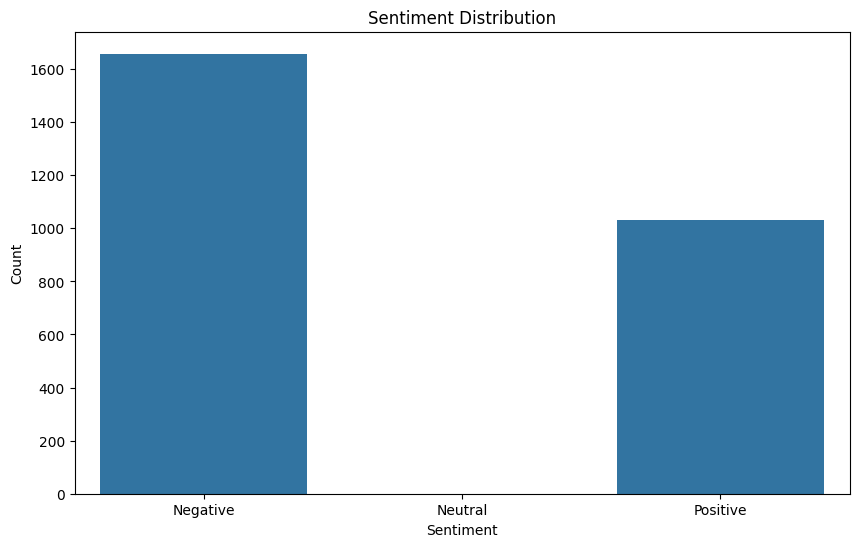

In [7]:
# Data description distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=cleaned_delta_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


### Preprocessing Data ###

In [8]:
def tokenize_text(text):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(text)
    return embeddings

cleaned_delta_df['embedding'] = cleaned_delta_df['reviews'].apply(tokenize_text)

### Model Training ###

In [ ]:
# Features and target
X = np.array(cleaned_delta_df['embedding'].tolist())
y = cleaned_delta_df['sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{report}")

### Visualizing Model ###

In [ ]:
def plot_decision_tree(model, feature_names, max_depth=3, figsize=(20,10)):
    plt.figure(figsize=figsize)
    # Get a single tree from the forest
    tree = model.estimators_[0]
    plot_tree(tree, 
             feature_names=feature_names,
             max_depth=max_depth,
             filled=True,
             rounded=True)
    plt.show()

def plot_feature_importance(model, feature_names, figsize=(10,6)):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=figsize)
    plt.title('Feature Importance in Delta Airlines Reviews')
    plt.bar(range(len(importances)), 
            importances[indices],
            align='center')
    plt.xticks(range(len(importances)), 
               [feature_names[i] for i in indices], 
               rotation=45,
               ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize feature importance
feature_names = ['Date', 'Traveler Types']  # Your actual feature names
plot_feature_importance(
    model=model,
    feature_names=feature_names
)

# Visualize a single tree from the forest
plot_decision_tree(
    model=model,
    feature_names=feature_names,
    max_depth=3
)